## Data Analysis

In this notebook, we use functions from the data functions file to analyze and create visualizations of our data.

## Setup

We start by accessing functions and loading in the SIPP and NPSAS data

In [1]:
%run 2-DataFunctions.ipynb

C:\Users\shell\AppData\Local\Temp\ipykernel_13972\1531450261.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  sipp_2014_2021 = pd.read_csv(r"C:\Users\shell\Python stuff\SIPP data\SIPP_2014_2021.txt", index_col=0)


In [2]:
sipp_2014_2021 = sipp_clean(sipp_2014_2021)
NPSAS = datalab_round(NPSAS)
NPSAS_20 = datalab_round(NPSAS_20)
plt.rcParams["figure.figsize"] = [9.6, 7.2]
fontsize = 12
plt.rcParams.update({'font.size': fontsize})

## Variables

Here we plot current student debt by factors from both the SIPP from 2014 to 2021 and NPSAS 2015-16 undergraduate study. Descriptions are given in the markdown cell beneath each graph.

### Longitudinal Trends in debt

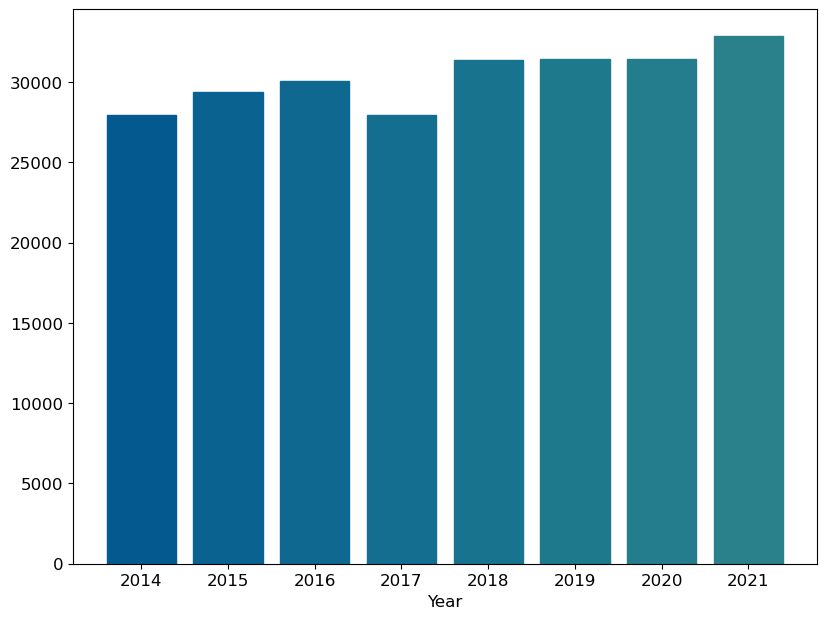

In [3]:
mean_bar_graph(sipp_2014_2021, 'YEAR', 'TOEDDEBTVAL', '', 'Year', '')

Average student loan debt by year

### 1. Demographics

Here we plot trends in average student debt correlating to age, racial identification, and gender. 

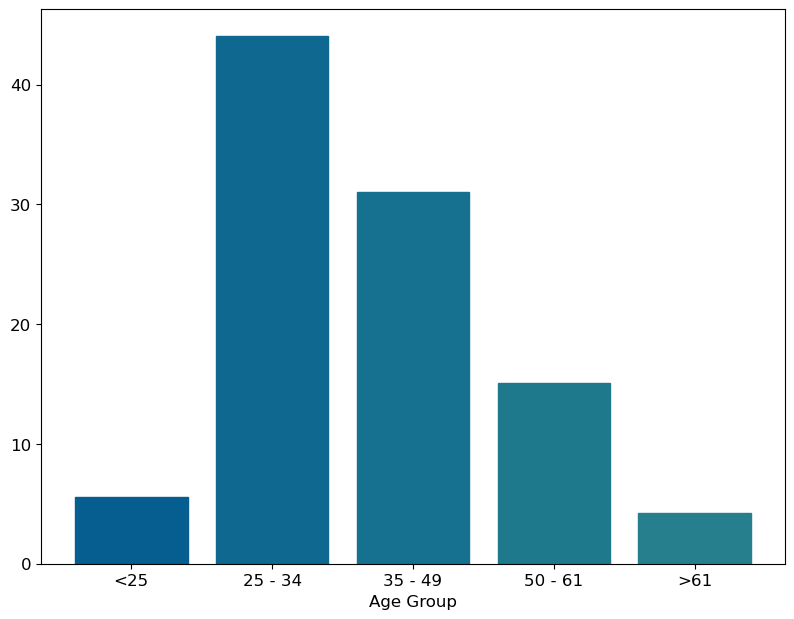

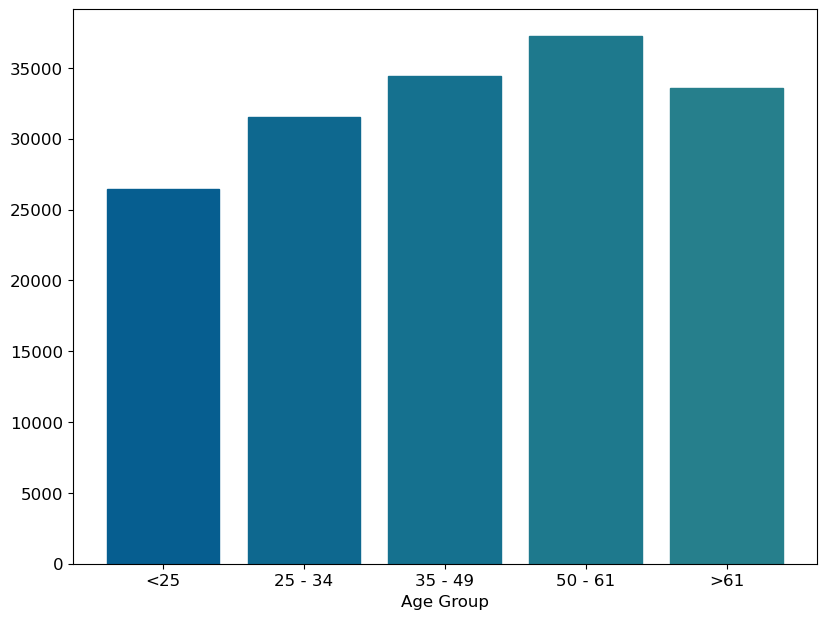

In [4]:
age_df = age_percent_total(group_age(sipp_2014_2021[sipp_2014_2021['YEAR'] == 2021]), 'TOEDDEBTVAL')

bars = plt.bar(age_df['TAGE'], age_df['percent of TOEDDEBTVAL'])
color_gradient_bars(bars, '#00538f', '#308389')
plt.xlabel('Age Group')
plt.show()

bars = plt.bar(age_df['TAGE'], age_df['mean TOEDDEBTVAL'])
color_gradient_bars(bars, '#00538f', '#308389')
plt.xlabel('Age Group')
plt.show()

Percent of Total Student Loan Debt by Age Group (SIPP 2021)
and
Average Student Loan Debt by Age Group (SIPP 2021)

By age, the majority of debt is held by younger people, specifically those 25-34 years old. However, older debt holders tend to have more debt.

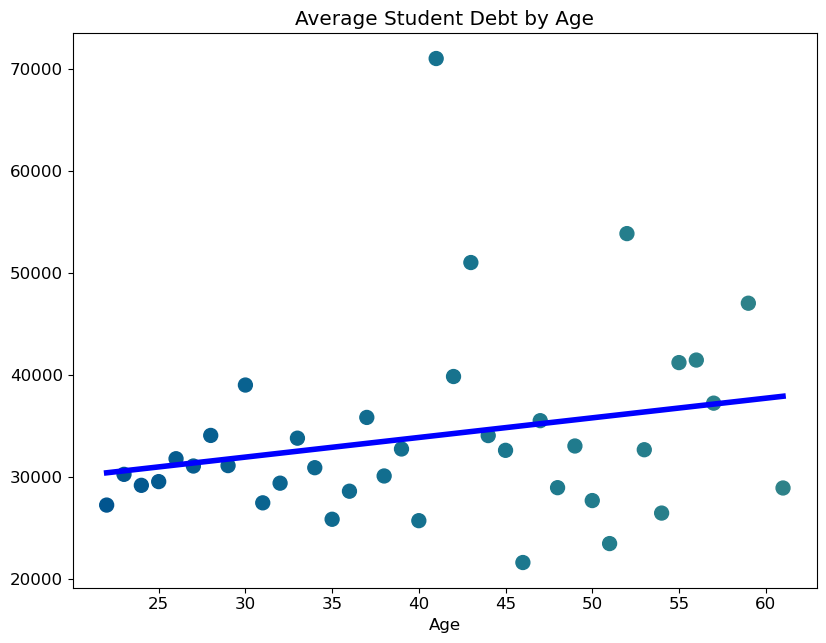

In [5]:
mean_regression(sipp_2014_2021[sipp_2014_2021['YEAR'] == 2021], 'TAGE', 'TOEDDEBTVAL', 'Average Student Debt by Age', 'Age', '', 1)

C:\Users\shell\AppData\Local\Temp\ipykernel_13972\1666427520.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  sipp_unfiltered = pd.read_csv(r"C:\Users\shell\Python stuff\SIPP data\SIPP_2014_2021.txt", index_col=0)


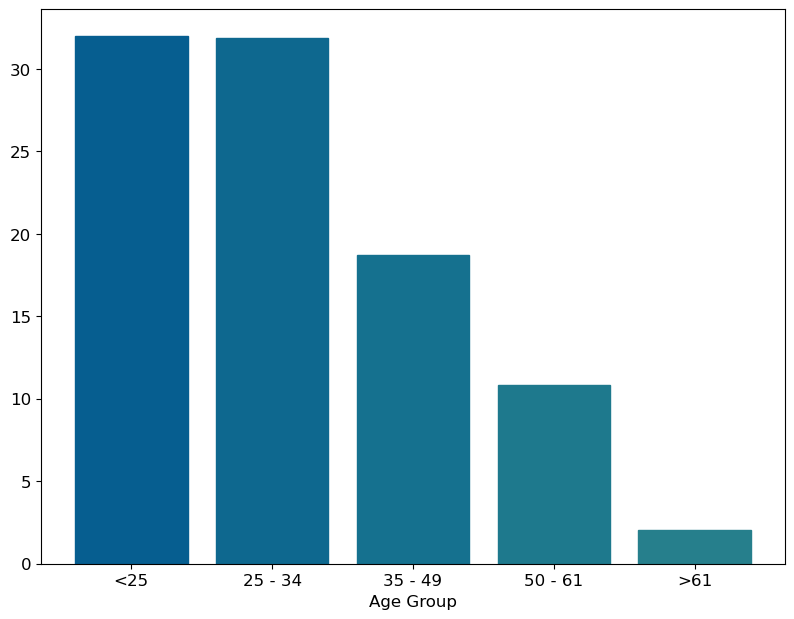

In [6]:
age_df = add_percent_by_age(age_df, 'TAGE', 'TOEDDEBTVAL')
bars = plt.bar(age_df['TAGE'], age_df['Percent of total TOEDDEBTVAL per TAGE'])
color_gradient_bars(bars, '#00538f', '#308389')
plt.xlabel('Age Group')
plt.show()

Percent of people with debt by age group

In [7]:
race_df = mean_sort_by(sipp_2014_2021[sipp_2014_2021['YEAR'] == 2021], 'ERACE', 'TOEDDEBTVAL')
race_df.drop(3, axis=0, inplace=True)
race_df['ERACE'] = ['White Alone', 'Black Alone', 'Asian Alone']
race_df[race_df.columns[0]] = race_df.iloc[:, 0].astype('string')

In [8]:
display(race_df)

,ERACE,total TOEDDEBTVAL,percent TOEDDEBTVAL,mean TOEDDEBTVAL
0,White Alone,25767312.0,73.848488,31929.754647
1,Black Alone,5332040.0,15.281497,36772.689655
2,Asian Alone,2103280.0,6.027949,34480.000000


C:\Users\shell\AppData\Local\Temp\ipykernel_13972\3534636263.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  sipp_unfiltered = pd.read_csv(r"C:\Users\shell\Python stuff\SIPP data\SIPP_2014_2021.txt", index_col=0)


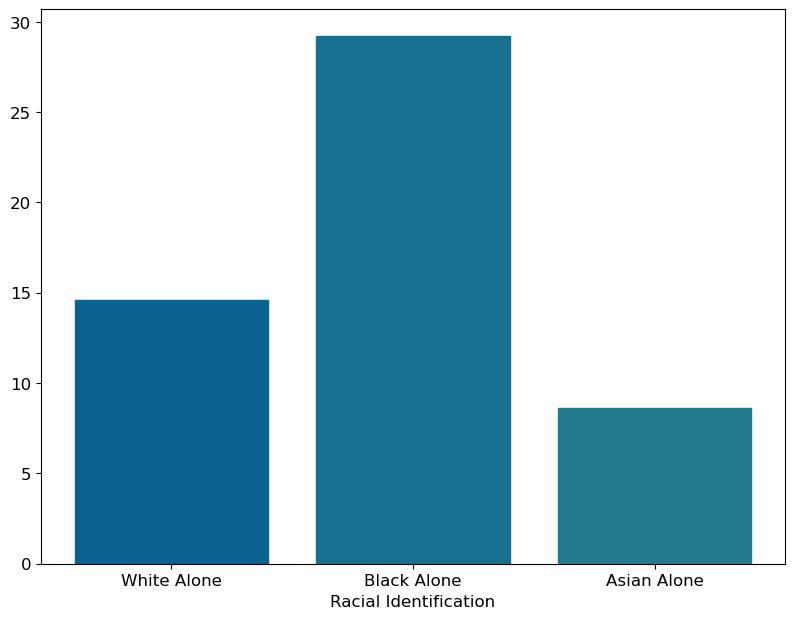

In [9]:
race_df['ERACE'] = [1, 2, 3]
race_df2 = add_percent(race_df, 'ERACE', 'TOEDDEBTVAL')
race_df['ERACE'] = ['White Alone', 'Black Alone', 'Asian Alone']
race_df2['ERACE'] = ['White Alone', 'Black Alone', 'Asian Alone']

bars = plt.bar(race_df2['ERACE'], race_df2['Percent of total TOEDDEBTVAL per ERACE'])
color_gradient_bars(bars, '#00538f', '#308389')
plt.xlabel('Racial Identification')
plt.show()

Percent of People with Student Debt By Racial Identification

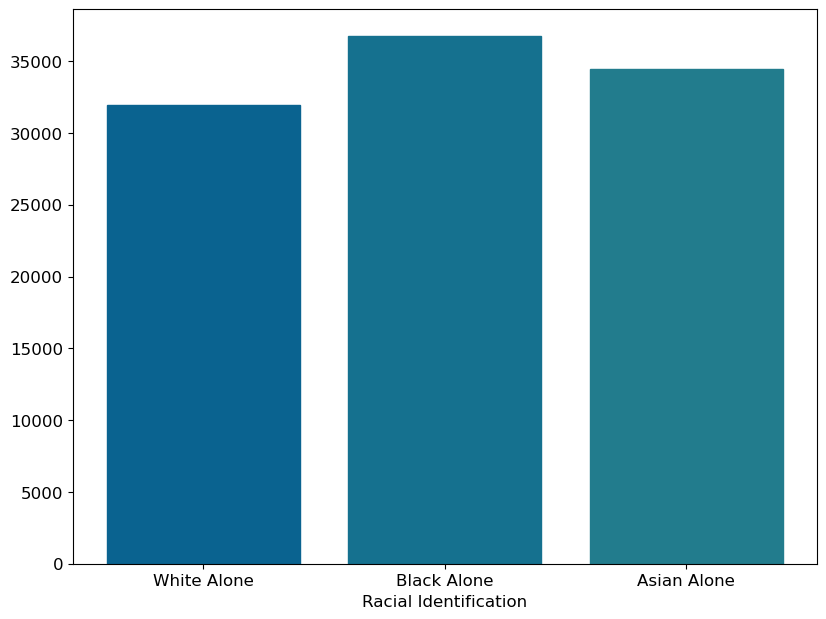

In [10]:
bars = plt.bar(race_df['ERACE'], race_df['mean TOEDDEBTVAL'])
color_gradient_bars(bars, '#00538f', '#308389')
plt.xlabel('Racial Identification')
plt.show()

Average Student Loan Debt By Racial Identification

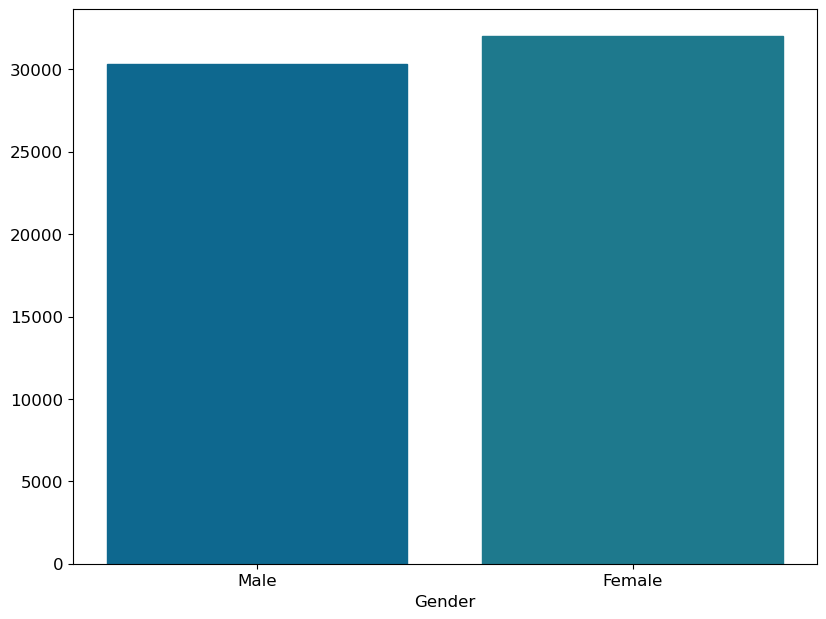

In [11]:
bars = datalab_bar_graph(NPSAS_20, 'Gender', False, '', 'Gender', '')

Average Student Debt by Gender (NPSAS 2020)

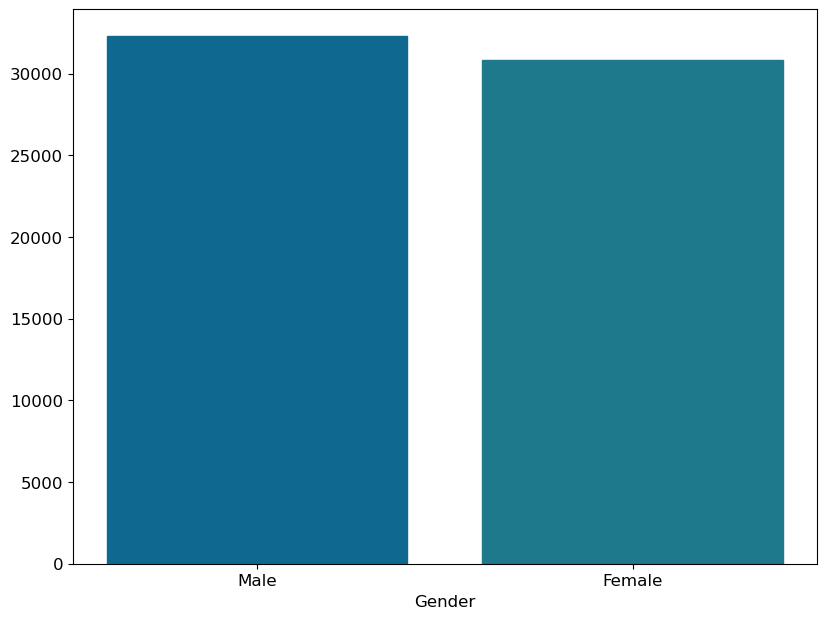

In [12]:
mean_bar_graph(sipp_2014_2021[sipp_2014_2021['YEAR'] == 2020], 'ESEX', 'TOEDDEBTVAL', '', 'Gender', '')

Average Student Loan Debt by Gender (SIPP 2020)

C:\Users\shell\AppData\Local\Temp\ipykernel_13972\3534636263.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  sipp_unfiltered = pd.read_csv(r"C:\Users\shell\Python stuff\SIPP data\SIPP_2014_2021.txt", index_col=0)


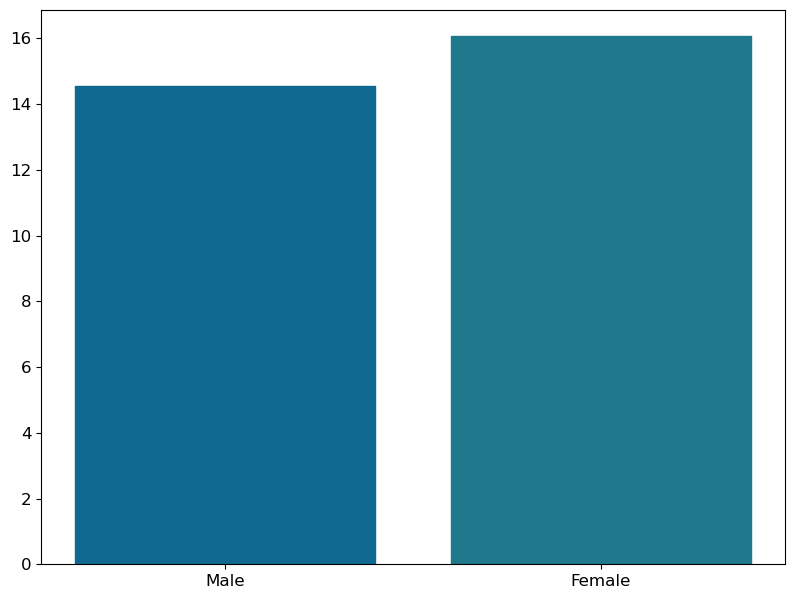

In [13]:
gender_df = pd.DataFrame()
gender_df['ESEX'] = [1, 2]
gender_df = add_percent(gender_df, 'ESEX', 'TOEDDEBTVAL')
gender_df['ESEX'] = ['Male', 'Female']
bars = plt.bar(gender_df['ESEX'], gender_df['Percent of total TOEDDEBTVAL per ESEX'])
color_gradient_bars(bars, '#00538f', '#308389')
plt.show()

Percent of people with student loan debt by gender

### 2. Income

Here we plot trends related to both independent and dependent income

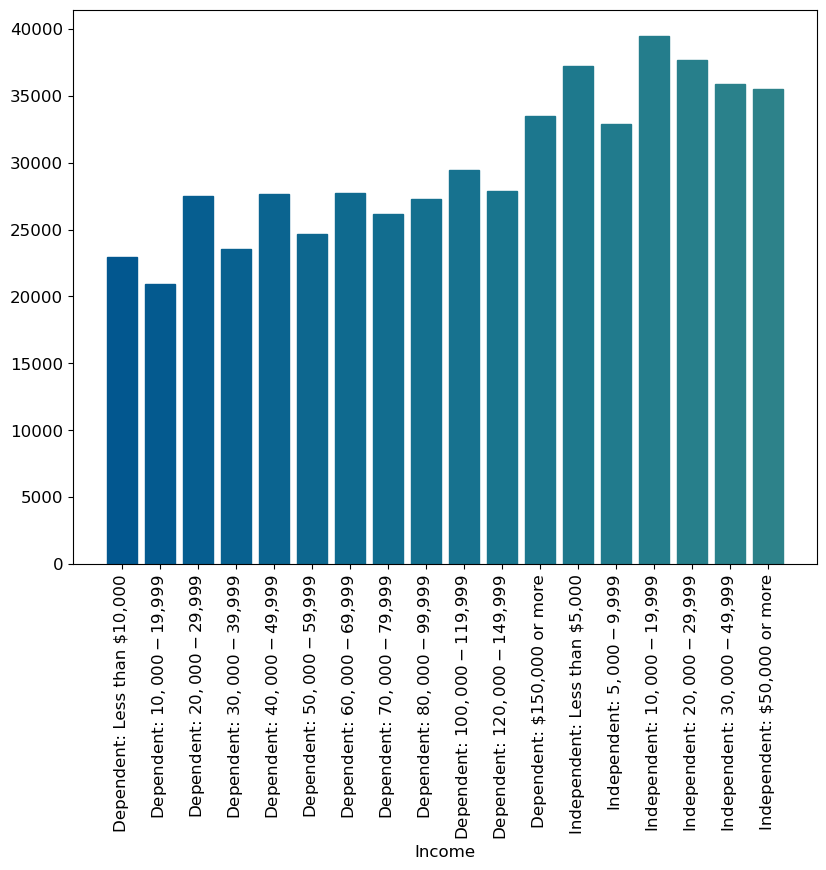

In [14]:
datalab_bar_graph(NPSAS_20, 'Total income by dependency (categorical)', False, '', 'Income', '')
plt.xticks(rotation = 90)
plt.show()

The above graph gives us the information we need, but its not in a very helpful way. The values are hard to see and it's difficult to distiinguish which values belong to the independent or dependent income category. To remedy this, we set up custom colors for the independent and dependent categories and display the income values horizontally to make them more legible.

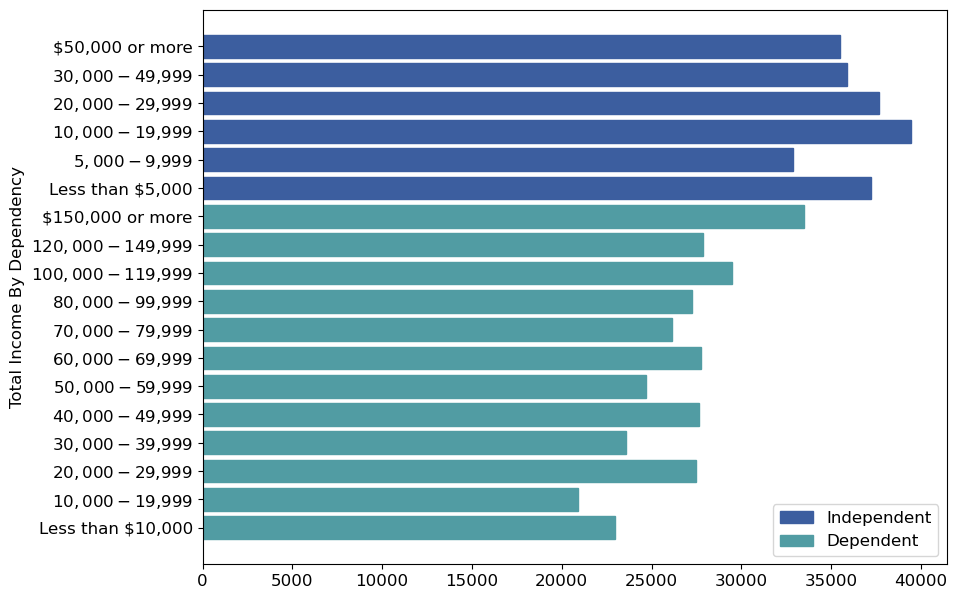

In [15]:
#Fix labels to remove the tags for income type
for x in range(12):
    NPSAS_20['Value'].iloc[8+x] = NPSAS_20['Value'].iloc[8+x].replace('Dependent: ', '')
for x in range(6):
    NPSAS_20['Value'].iloc[20+x] = NPSAS_20['Value'].iloc[20+x].replace('Independent: ', '')

df = NPSAS_20[NPSAS_20['Category'] == 'Total income by dependency (categorical)']
values = NPSAS_20['Value'].loc[NPSAS_20['Category'] == 'Total income by dependency (categorical)']
bars = plt.barh(range(len(df['Value'])), df['Amount still owed on all undergraduate loans ( Average Without Zeros )'])
plt.ylabel('Total Income By Dependency')
plt.yticks(range(len(values)), values)

#set up custom legend for income type
c1 = [(x/255) for x in [60,94,159]]
c2 = [(x/255) for x in [81,156,163]]
colors = {'Independent': c1, 'Dependent': c2}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
for x in range(18):
    if x > 11:
        bars[x].set_color(c1)
    else:
        bars[x].set_color(c2)

Average Student Debt by Total Income and Dependency

### 3. College Entrance Test Scores

In this section we plot the effect of a student's ACT and/or SAT scores among students who took the tests and the effect of taking either test on average student debt.

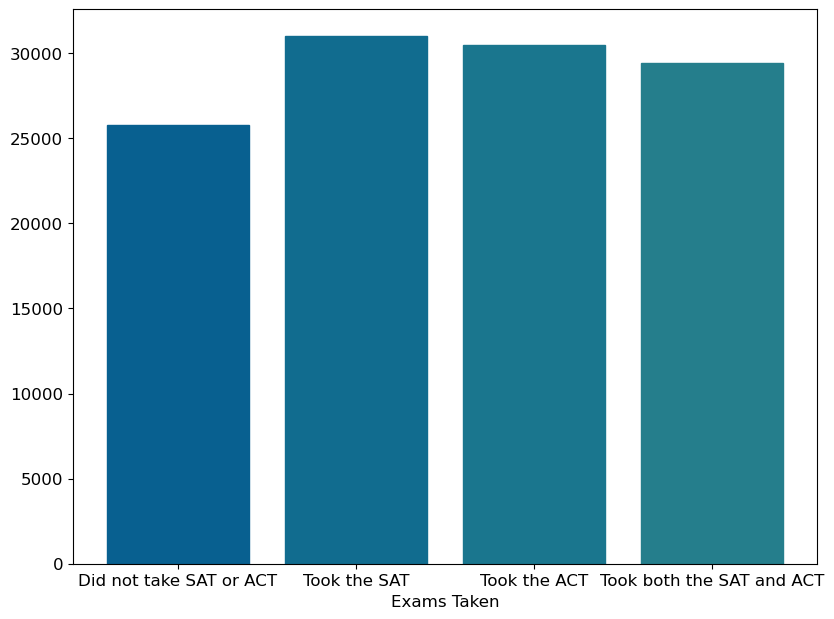

In [16]:
bars = datalab_bar_graph(NPSAS_20, 'Took SAT or ACT exams', False, '', 'Exams Taken', '')

Average Student Loan Debt by Exams Taken

Although the difference is exaggerated by this graph, we can see that, among those with debt, students who take both the SAT and ACT have about $1000 less debt than those who don't take either test. The SAT also has a much higher impact individually than the ACT, likely due to the fact that it is often the only test that students take and that it is more widely used for college merit.

<BarContainer object of 6 artists>

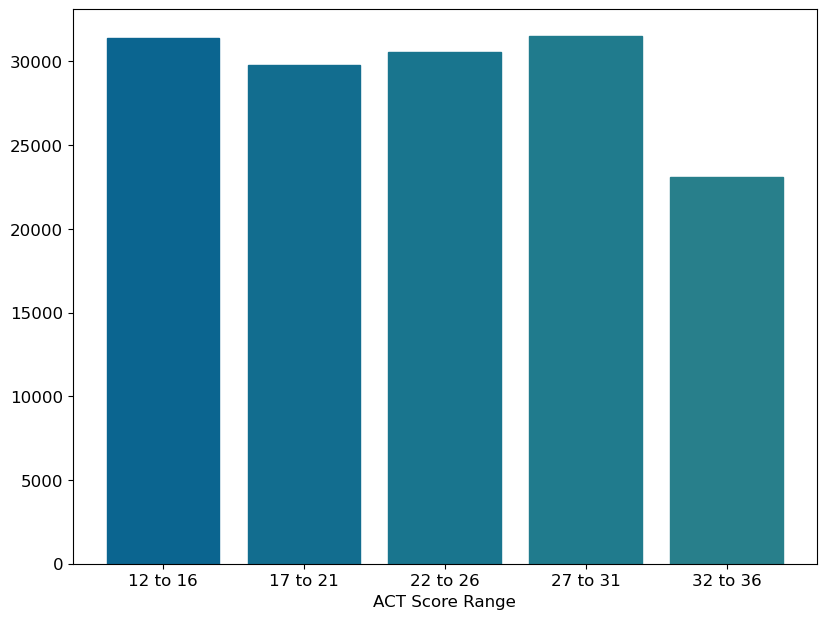

In [17]:
datalab_bar_graph(NPSAS_20, 'ACT derived composite score', False, '', 'ACT Score Range', '')

Average Student Loan Debt by ACT Score Range

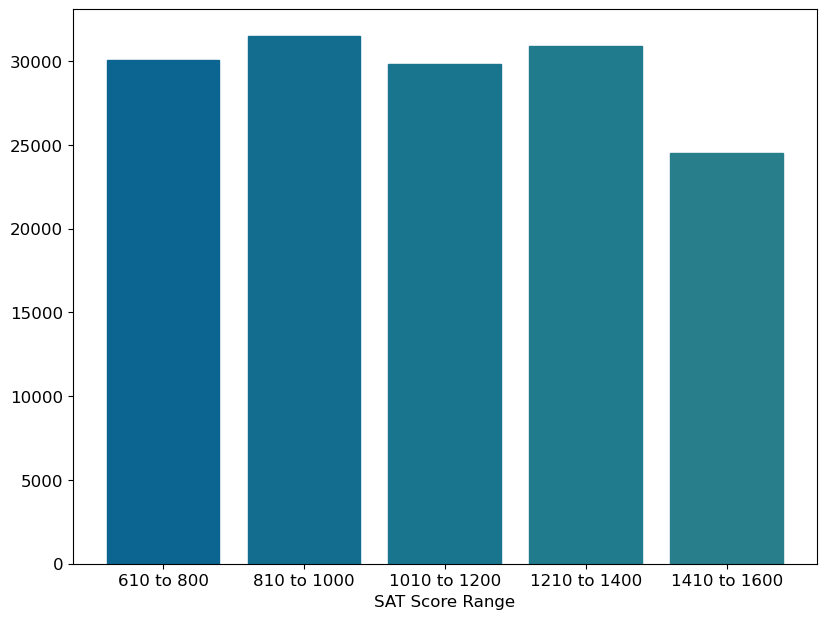

In [18]:
bars = datalab_bar_graph(NPSAS_20, 'SAT derived composite score', False, '', 'SAT Score Range', '')

Average Student Loan Debt by SAT Score Range

### 4. Geographical Region

Here we use GeoPandas to plot a maps of the united states by state and BEA region to examine how average student debt changes in different parts of the United States

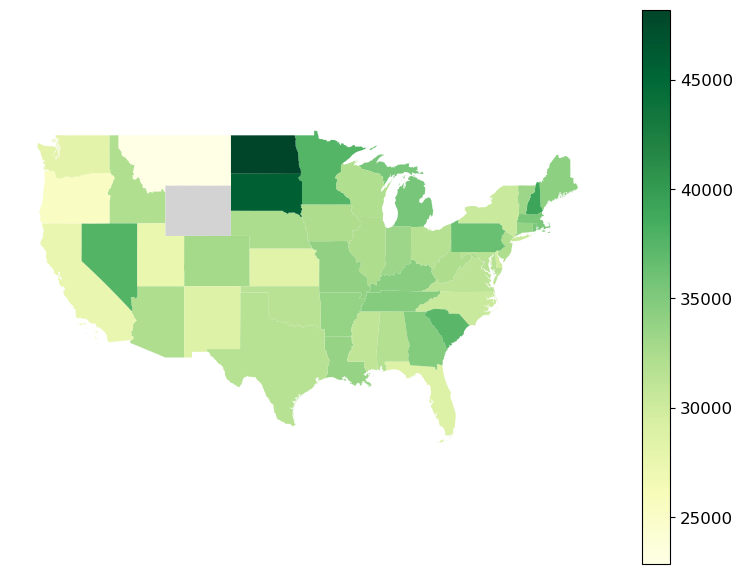

In [19]:
plt.rcParams.update({'font.size': 12})
datalab_graph_geo('state', 'YlGn')

Average Student Debt by Student's State of Residence

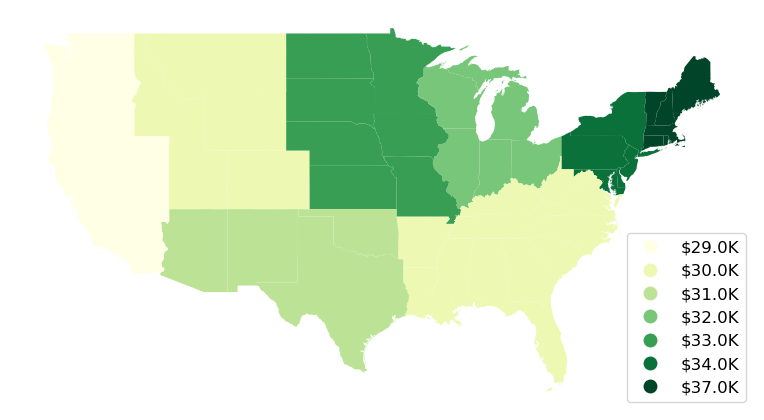

In [20]:
datalab_graph_geo('region', 'YlGn')
plt.rcParams.update({'font.size': fontsize})

Average Student Debt by Region of Institution Attended

### 5. High School and College GPA

Here we graph how high school GPA and college GPA affect average student debt.

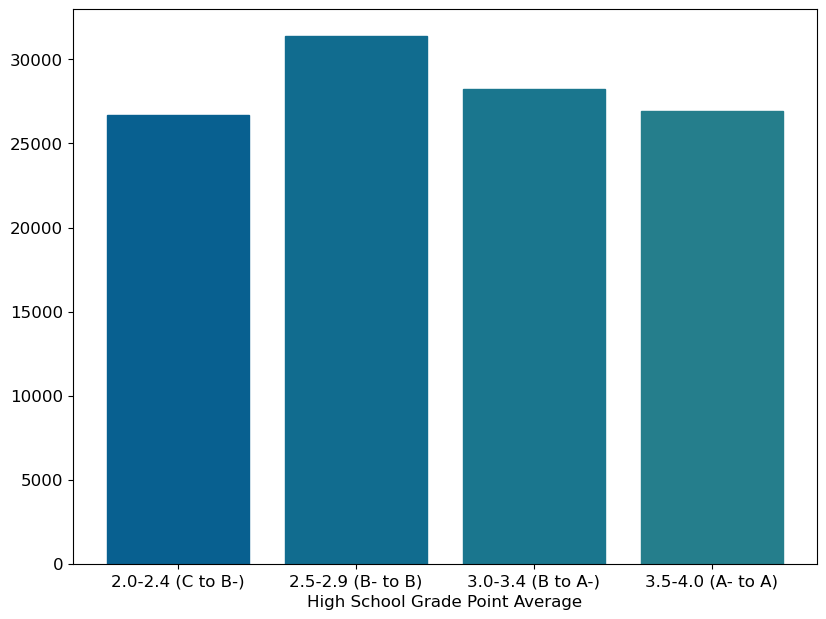

In [21]:
bars = datalab_bar_graph(NPSAS_20, 'Grade point average in high school', False, '', 'High School Grade Point Average', '')

Average Student Loan Debt by High School Grade Point Average

As could be guessed, from 2.0 and up, students with higher high school GPAs have less debt. Among those with debt, bachelor's degree holders with a 2.0 to 2.4 GPA owe about 4000 dollars more in student debt than students with a 3.5-4.0 GPA. Theres also about a 2000 dollar difference between 3.0-3.4 and 3.5-4.0, likely from higher scholarships going to students with these higher GPAs and their ability to attend more selective schools.

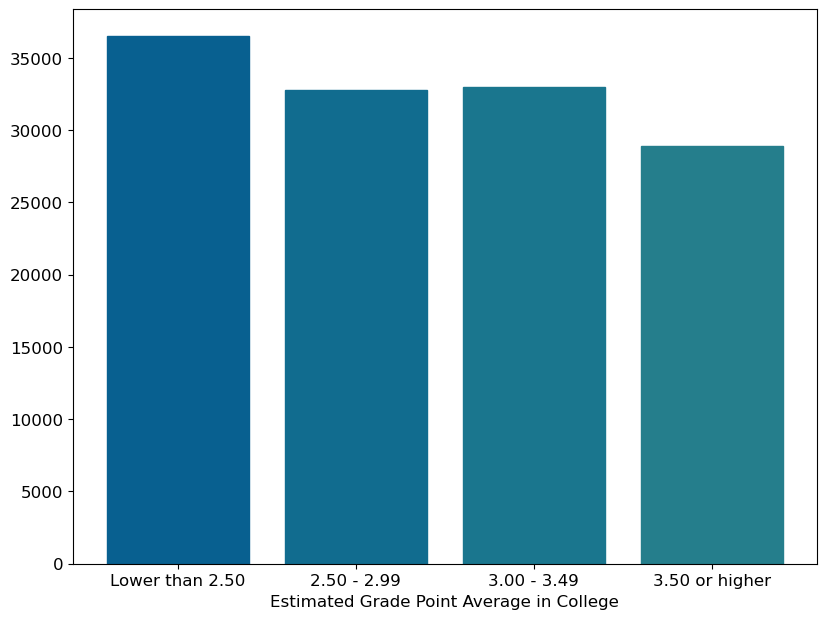

In [22]:
bars = datalab_bar_graph(NPSAS_20, 'Estimated grade point average', False, '', 'Estimated Grade Point Average in College', '')

Average Student Loan Debt by Estimated Grade Point Average in College

### 6. Institution Characteristics

Here we graph the effects of institution selectivity, type, and minority serving type on average student debt for students of those institutions

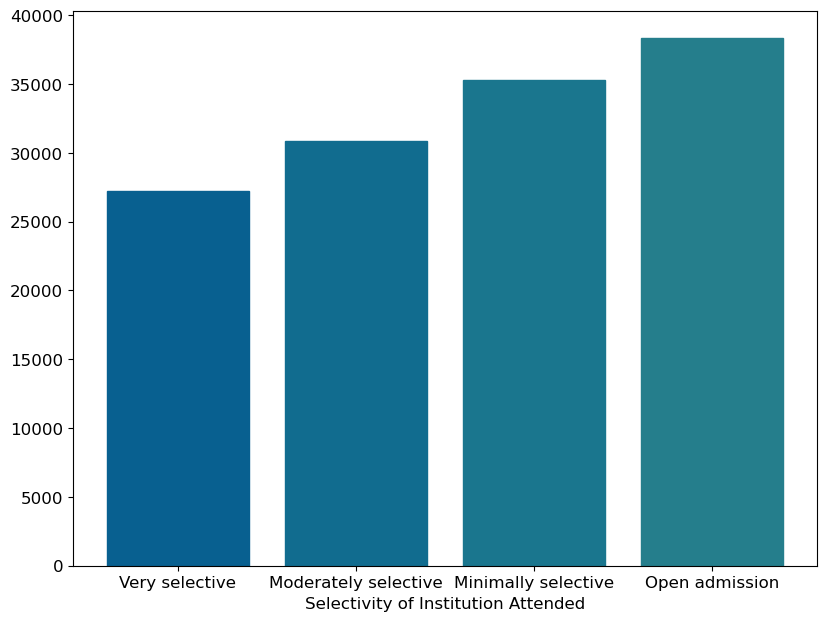

In [23]:
bars = datalab_bar_graph(NPSAS_20, 'Selectivity (All 4-year institutions)', False, '', 'Selectivity of Institution Attended', '')

The selectivity of a student's attended school, however, has a surprising trend. Excluding open admission schools, the more selective the school, the less debt students have. This is likely due to more selective schools having policies like the 'no-loan' policy, which guarantees a college will match the entirety of a student's demonstrated need. Open admissions colleges are the outlier here, however, as their bachelor's degree receivers tend to have less debt than a minimally selective college, but more than a moderately selective one. My hypothesis is that open admission colleges have lower standards for class quality, and thus charge less for attendance. It could also be true that they are mostly attended by local students, since they are uncompetitive, saving students money in dorm costs. However, there's no real evidence to back up either of these hypotheses.

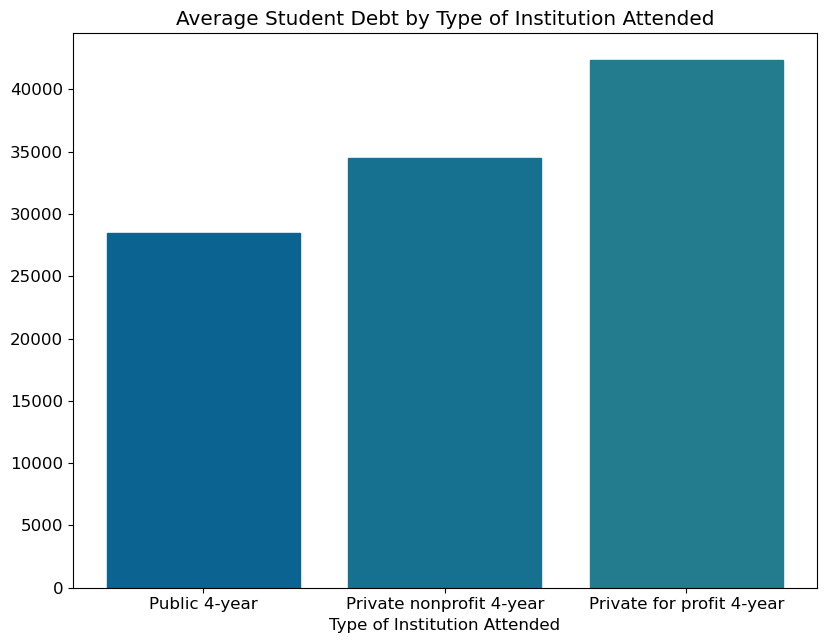

In [24]:
bars = datalab_bar_graph(NPSAS_20, 'NPSAS institution type (IPEDS sector)', False, 'Average Student Debt by Type of Institution Attended', 'Type of Institution Attended', '')

When comparing the student loan debt of students attending different types of institution, we see the rather obvious pattern that students who attend public schools have less student loan debt on average while those attending private non-profit or for-profit schools obtain more debt, likely due to higher tuitions

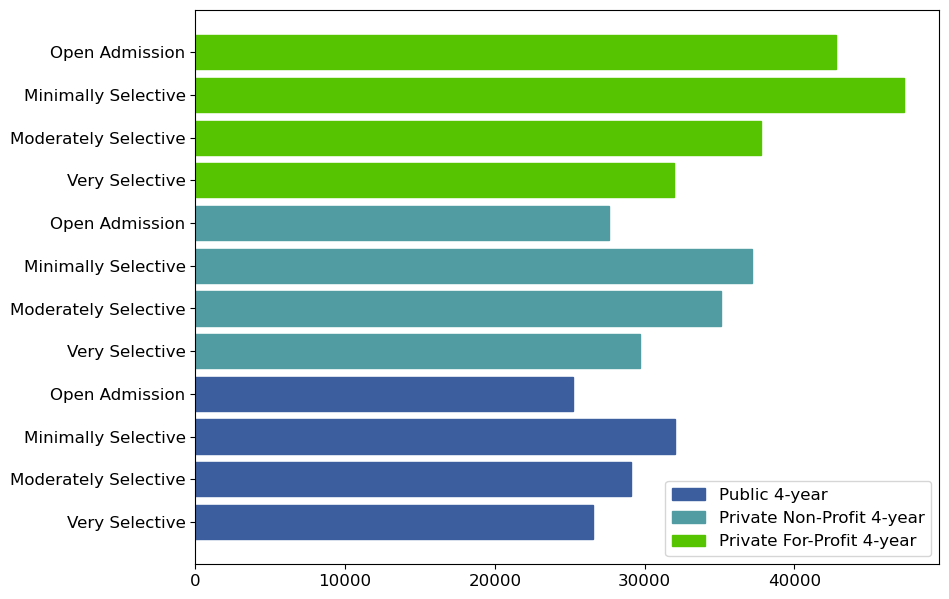

In [25]:
#Fix labels to remove the tags for institution type
for x in range(3):
    NPSAS['Value'].iloc[range(4*x+168, 4*x+172)] = ['Very Selective', 'Moderately Selective', 'Minimally Selective', 'Open Admission']
df = NPSAS[NPSAS['Category'] == 'NPSAS Institution Type and Institution Selectivity']
values = NPSAS['Value'].loc[NPSAS['Category'] == 'NPSAS Institution Type and Institution Selectivity']
bars = plt.barh(range(len(df['Value'])), df['Amount still owed on all undergraduate loans ( Average Without Zeros )'])
plt.yticks(range(len(values)), values)

#set up custom legend for institution type
c1 = [(x/255) for x in [60,94,159]]
c2 = [(x/255) for x in [81,156,163]]
c3 = [(x/255) for x in [86,196,0]]
colors = {'Public 4-year': c1, 'Private Non-Profit 4-year': c2, 'Private For-Profit 4-year': c3}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
for x in range(12):
    if x < 4:
        bars[x].set_color(c1)
    if x > 3 and x < 8:
        bars[x].set_color(c2)
    if x > 7:
        bars[x].set_color(c3)


Average Student Debt by Type and Selectivity of Institution Attended

Although it could be inferred from the previous two graphs that a very selective and public school would minimize a student's debt, graphing by both institution type and selectivity reveals that it is still one of the best ways. However, it also reveals that open admissions colleges, both public and private non-profit, similarly produce less indebted students. This is due to the generally much lower tuitions of open admissions schools, excepts in the case of for-profit schools.

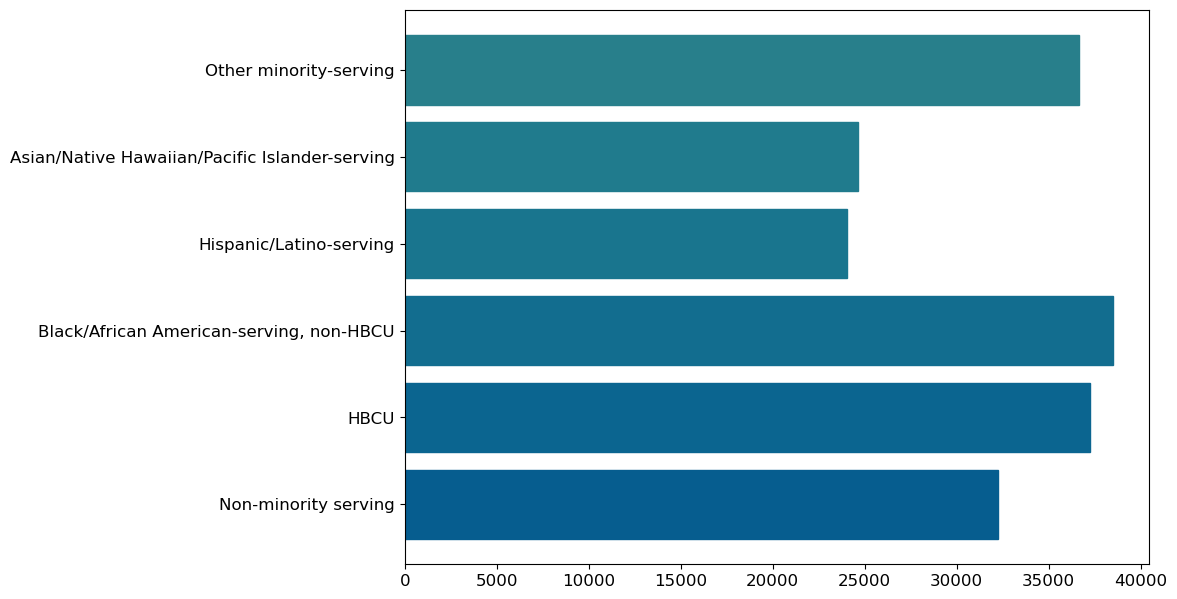

In [26]:
indicator_df = NPSAS_20[NPSAS_20['Category'] == 'Minority Serving Institution indicator']
bars = plt.barh(indicator_df['Value'], indicator_df['Amount still owed on all undergraduate loans ( Average Without Zeros )'])
color_gradient_bars(bars, '#00538f', '#308389')
plt.show()

Average Student Loan Debt by Type of Minority Serving Instiution Indicator of Institution Attended

### 7. Socioeconomic Status

Here we graph the effect of socioeconomic status on average student debt owed.

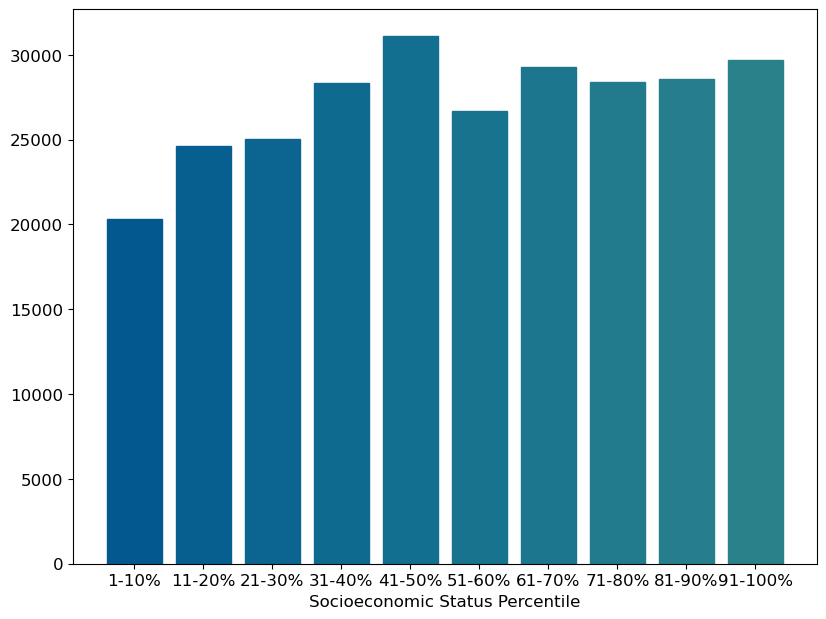

In [27]:
bars = datalab_bar_graph(NPSAS_20, 'Socioeconomic status percentile', False, '', 'Socioeconomic Status Percentile', '')

Average Student Loan Debt by Socioeconomic Status Percentile